In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
class MLP(torch.nn.Module):
    
    def __init__(self, n_inputs, n_outputs, n_layers, n_hidden):
        super(MLP, self).__init__()
        self.n_layers = n_layers
        self.layers = torch.nn.ModuleList()
        for i in range(n_layers - 1):
            if i == 0:
                self.layers.append(torch.nn.Linear(n_inputs, n_hidden))
            else:
                self.layers.append(torch.nn.Linear(n_hidden, n_hidden))
        
        self.layers.append(torch.nn.Linear(n_hidden, n_outputs))
        
    
    def forward(self, x):
        for i in range(self.n_layers - 1):
            x = self.layers[i](x)
            x = torch.relu(x)
        x = self.layers[-1](x)
        return x    
    

torch.Size([800, 1])


/Users/amaurisouza/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


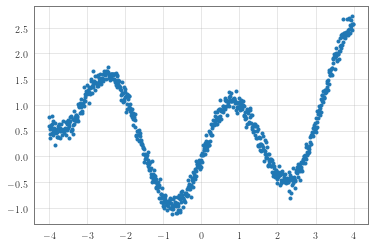

In [3]:
## Dados

x = torch.arange(-4, 4, 0.01).unsqueeze(1)
print(x.shape)
y = 0.1*x**2 + torch.sin(2*x) + 0.1*torch.randn(x.shape[0], x.shape[1])

plt.plot(x, y, '.')

In [18]:
model = MLP(1, 1, 5, 10)

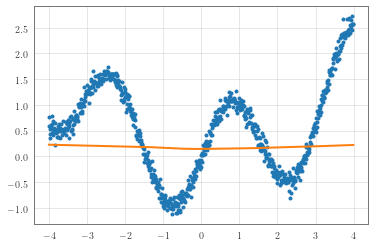

In [19]:
model.eval()
with torch.no_grad():
    pred = model.forward(x)
plt.plot(x, y, '.')
plt.plot(x, pred, '-')

In [20]:
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for j in range(150): #numero de epocas
    for n in range(x.shape[0]):
        optimizer.zero_grad()

        y_hat = model(x[n])
        error = (y[n] - y_hat)**2  # loss (funcao de custo)
        
        error.backward()
        optimizer.step() 
    

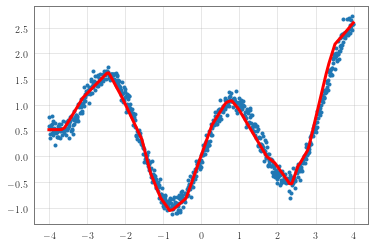

In [23]:
model.eval()
with torch.no_grad():
    pred = model(x)
plt.plot(x, y, '.')
plt.plot(x, pred, 'r-', linewidth=3)
